## Ideas ##


In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

### artificial 16-QAM ###

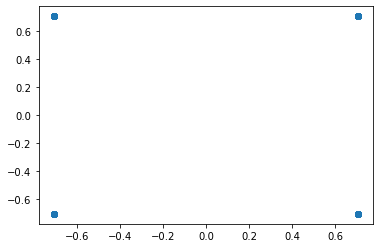

In [2]:
# erster Modulator
A = np.exp(1j*rng.integers(4, size=1000)*np.pi/2+1j*np.pi/4)
plt.scatter(np.real(A),np.imag(A))

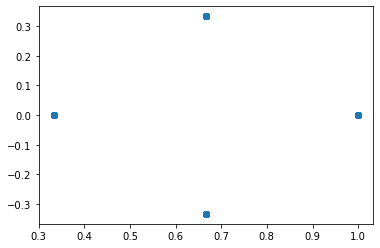

In [3]:
#zweiter Modulator: offset damit neues Symbol in der Nähe des ursprünglichen Symbols liegt
a=1/3
B = (1-a) + a*np.exp(1j*np.pi/2*rng.integers(4, size=1000))
B1 = 2/3 + 1/3*np.exp(1j*np.pi/2*0)
B2 = 2/3 + 1/3*np.exp(1j*np.pi/2*1)
B3 = 2/3 + 1/3*np.exp(1j*np.pi/2*2)
B4 = 2/3 + 1/3*np.exp(1j*np.pi/2*3)
#B = rng.choice([1,0.6,0.9+1j*0.1,0.9-1j*0.1],1000)
plt.scatter(np.real(B),np.imag(B))

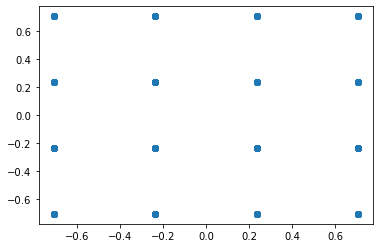

In [4]:
#Überlagerung
C=A*B
plt.scatter(np.real(C),np.imag(C))
#plt.scatter(np.real(A*B1),np.imag(A*B1),color='r')
#plt.scatter(np.real(A*B2),np.imag(A*B2),color='b')
#plt.scatter(np.real(A*B3),np.imag(A*B3),color='g')
#plt.scatter(np.real(A*B4),np.imag(A*B4),color='orange')

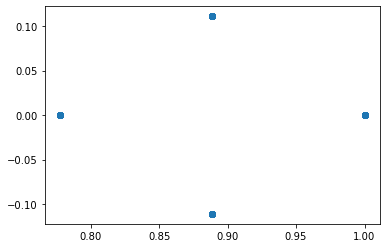

In [28]:
# mehr überlagerung
a=1/9
Bx = (1-a) + a*np.exp(1j*np.pi/2*rng.integers(4, size=1000))
#Bx = rng.choice([1,1-a,0.8+1j*0.2,0.8-1j*0.2],1000)
plt.scatter(np.real(Bx),np.imag(Bx))

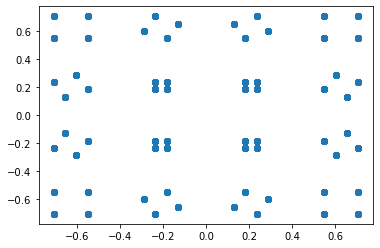

In [29]:
Cx=C*Bx
plt.scatter(np.real(Cx),np.imag(Cx))


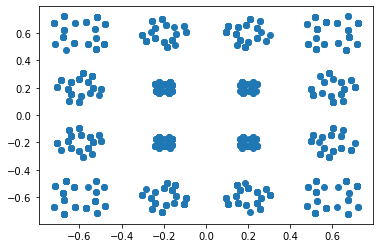

In [7]:
a=0.05
By = (1-a) + a*np.exp(1j*np.pi/2*rng.integers(4, size=1000)+1j*np.pi/4)
#By = rng.choice([1,1-a,0.97+1j*a,0.97-1j*a],1000)
Cy=Cx*By
plt.scatter(np.real(Cy),np.imag(Cy))

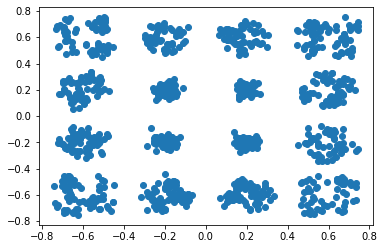

In [8]:
#AWGN channel
N=Cy+0.02*rng.normal(0,1,1000)+0.02j*rng.normal(0,1,1000)
plt.scatter(np.real(N),np.imag(N))

## Mathematical reduction to addition ##

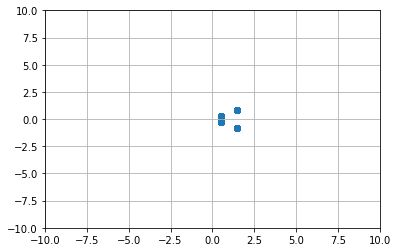

In [9]:
# ln(a*b)=ln(a)+ln(b) and complex logarithm: ln(a*exp(jb))=ln(a)+jb
ar=0.5
ai=0.5
Cr=2*rng.integers(0,2,1000)-1
Ci=2*rng.integers(0,2,1000)-1

Mlog=np.exp(ar*Cr+1j*ai*Ci)
plt.scatter(np.real(Mlog),np.imag(Mlog))
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()

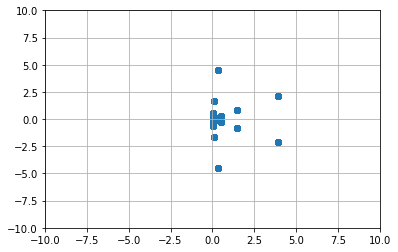

In [10]:
ar2=1
ai2=1
Cr2=2*rng.integers(0,2,1000)-1
Ci2=2*rng.integers(0,2,1000)-1

Mg=np.exp(ar2*Cr2+1j*ai2*Ci2)

Mall=Mg*Mlog
plt.scatter(np.real(Mall),np.imag(Mall))
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()

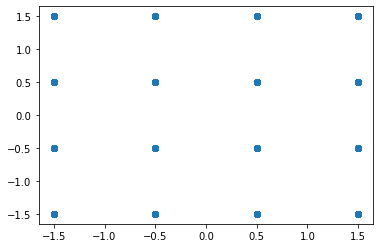

In [11]:
plt.scatter(np.log(np.abs(Mall)),np.angle(Mall))

very low error resilience, high peak power

### PSK +ASK ###

+ Synchonisierung ist egal
- nicht weiter skalierbar
- nicht unendlich effizient

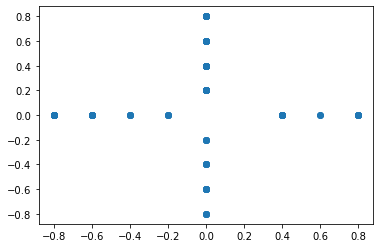

In [12]:
C1=0.2*rng.integers(1,5,100)
C2=np.exp(1j*rng.integers(0,4,100)*np.pi/2)
plt.scatter(np.real(C1*C2),np.imag(C1*C2))

low spectral efficiency, 

### Phase addition ###

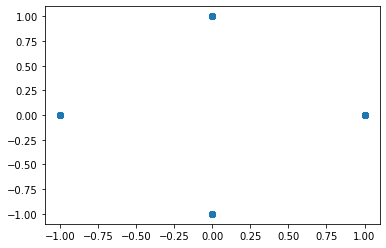

In [13]:
w1 = np.exp(1j*rng.integers(4, size=100)*np.pi/2)
plt.scatter(np.real(w1),np.imag(w1))

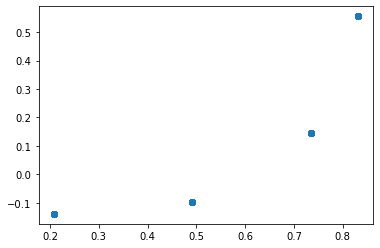

In [14]:
a=rng.integers(4, size=100)

w2 = 0.25*(a+1)*np.exp(1j*a*np.pi/8-1j*np.pi*3/16)
wx = 0.75*np.exp(1j*2*np.pi/8-1j*np.pi*3/16)
plt.scatter(np.real(w2),np.imag(w2))

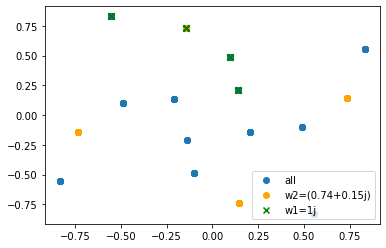

In [15]:
plt.scatter(np.real(w1*w2),np.imag(w1*w2),label='all')
plt.scatter(np.real(w1*wx),np.imag(w1*wx),color='orange', label='w2='+str(np.round(wx,2)))
plt.scatter(np.real(1j*w2),np.imag(1j*w2),marker='x',color='g', label='w1=1j')
plt.legend()

theoretisch gut mit weiteren Usern skalierbar, nur mit MZM durchführbar

## Komplexe Primzahlen: Gaussian Primes ##

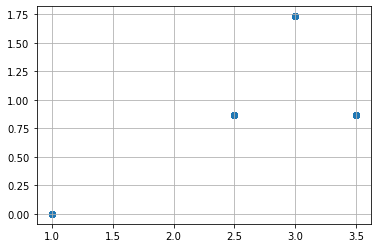

In [16]:
#eisenstein prime numbers
eisdict1 = {
  1: 1,
  2: 3+np.exp(1j*np.pi/3),
  3: 2+np.exp(1j*np.pi/3),
  4: 2+2*np.exp(1j*np.pi/3)

}

eisdict2 = {
  #1: 1,
  #2: 3+2*np.exp(1j*np.pi/3),
  #3: 4+np.exp(1j*np.pi/3),
  #4: 2
    1: 1,
    2: np.exp(1j*np.pi/3),
    3: np.exp(1j*4*np.pi/3),
    4: np.exp(1j*3*np.pi/3)
}

T1 = np.zeros(100,complex)
T2 = np.zeros(100,complex)
E1 = rng.integers(1,5, size=100)
E2 = rng.integers(1,5, size=100)
for e in range(np.size(E1)):
    T1[e]=eisdict1[E1[e]]
    T2[e]=eisdict2[E2[e]]

plt.scatter(np.real(T1),np.imag(T1))
plt.grid()


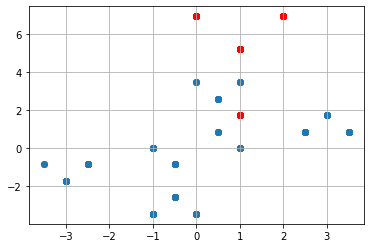

In [17]:
#T2=T2*np.exp(1j*np.pi/3)
plt.scatter(np.real(T1*T2),np.imag(T1*T2))
plt.scatter(np.real(T1*2*np.exp(1j*np.pi/3)),np.imag(T1*2*np.exp(1j*np.pi/3)),color='red')
#plt.scatter(np.real(T1*(1+np.exp(1j*np.pi/3))*np.exp(1j*np.pi/3)),np.imag(T1*(1+np.exp(1j*np.pi/3))*np.exp(1j*np.pi/3)),color='g')
#plt.scatter(np.real(T1*2),np.imag(T1*2),color='k')
#plt.scatter(np.real(T1*2),np.imag(T1*2),color='orange')

plt.grid()

[[ 0.+2.j -1.+3.j  1.+3.j  3.+3.j  2.+0.j  3.+1.j  3.-1.j  3.-3.j -2.+0.j
  -3.-1.j -3.+1.j -3.+3.j  0.-2.j  1.-3.j -1.-3.j -3.-3.j]]


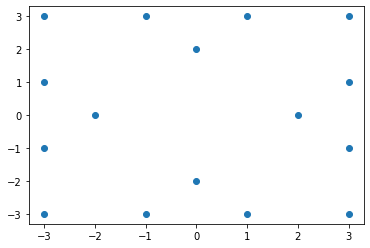

In [18]:
#Gaussian primes
G1=np.matrix([1+1j,1-1j,-1+1j,-1-1j])
G2=np.matrix([1+1j,1+2j, 2+1j,3])
G3=np.matrix([1+1j,3+2j,2+3j,1+4j]) # one number can occur multiple times

x=np.asarray(np.matrix.flatten(np.transpose(G1)*G2))
print(x)

plt.scatter(np.real(x),np.imag(x))

[[ -2. +2.j  -4. +6.j  -6. +4.j  -8. +2.j  -4. +2.j  -9. +7.j -11. +3.j
  -13. -1.j  -2. +4.j  -3.+11.j  -7. +9.j -11. +7.j   0. +6.j   3.+15.j
   -3.+15.j  -9.+15.j   2. +2.j   6. +4.j   4. +6.j   2. +8.j   2. +4.j
    7. +9.j   3.+11.j  -1.+13.j   4. +2.j  11. +3.j   9. +7.j   7.+11.j
    6. +0.j  15. -3.j  15. +3.j  15. +9.j  -2. -2.j  -6. -4.j  -4. -6.j
   -2. -8.j  -2. -4.j  -7. -9.j  -3.-11.j   1.-13.j  -4. -2.j -11. -3.j
   -9. -7.j  -7.-11.j  -6. +0.j -15. +3.j -15. -3.j -15. -9.j   2. -2.j
    4. -6.j   6. -4.j   8. -2.j   4. -2.j   9. -7.j  11. -3.j  13. +1.j
    2. -4.j   3.-11.j   7. -9.j  11. -7.j   0. -6.j  -3.-15.j   3.-15.j
    9.-15.j]]
[[-15. -9.j -15. -3.j -15. +3.j -13. -1.j -11. -3.j -11. +3.j -11. +7.j
   -9. -7.j  -9. +7.j  -9.+15.j  -8. +2.j  -7.-11.j  -7. -9.j  -7. +9.j
   -6. -4.j  -6. +0.j  -6. +4.j  -4. -6.j  -4. -2.j  -4. +2.j  -4. +6.j
   -3.-15.j  -3.-11.j  -3.+11.j  -3.+15.j  -2. -8.j  -2. -4.j  -2. -2.j
   -2. +2.j  -2. +4.j  -1.+13.j   0. -6.j   0. +6.

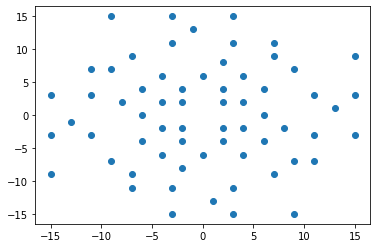

In [19]:
v=np.matrix.flatten(np.transpose(np.matrix.flatten(np.transpose(G1)*G2))*G3)
v=np.asarray(v)
print(v)
print(np.sort(v))
plt.scatter(np.real(v),np.imag(v))

## Phase MUSA ##

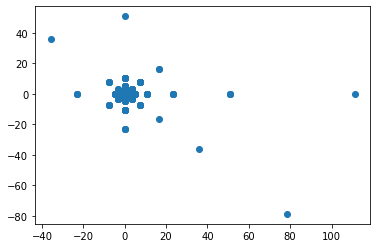

In [20]:
# multiplication == phase addition:
t=np.arange(4)
# spreading codes randomly created from: Multi-user  Shared  Access {1+i, −1+i, −l−i, l−i}=={pi/4+0.5*ln(2),-pi/4+0.5*ln(2),pi*3/4+0.5*ln(2),-pi*3/4+0.5*ln(2)} 

c1=[1,1,1,1]
c2=[1,1,-1,-1]
c3=[1,-1,-1,1]
c4=[1,-1,1,-1]

p1=2*rng.integers(-2,2,100)+1+1j*(2*rng.integers(-2,2,100)+1)
p2=2*rng.integers(-2,2,100)+1+1j*(2*rng.integers(-2,2,100)+1)
p3=2*rng.integers(-2,2,100)+1+1j*(2*rng.integers(-2,2,100)+1)
p4=2*rng.integers(-2,2,100)+1+1j*(2*rng.integers(-2,2,100)+1)

y=np.zeros(400,complex)
for info in range(100):
    for tsig in t:
        y[4*info+tsig]=np.exp(1j*np.pi*0.125*p1[info]*c1[tsig])*np.exp(1j*np.pi*0.125*p2[info]*c2[tsig])*np.exp(1j*np.pi*0.125*p3[info]*c3[tsig])*np.exp(1j*np.pi*0.125*p4[info]*c4[tsig])
    
        
plt.scatter(np.real(y),np.imag(y))


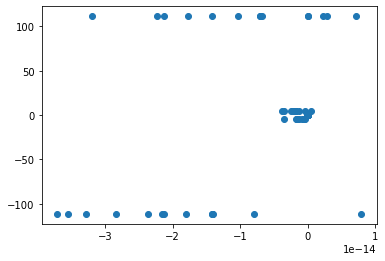

In [21]:
yr=np.reshape(y,(100,4))
e1=np.zeros(100,complex)
e2=np.zeros(100,complex)
e3=np.zeros(100,complex)
e4=np.zeros(100,complex)

for info in range(100):
    e1[info]=yr[info,0]*yr[info,1]*yr[info,2]*yr[info,3]
    e2[info]=yr[info,0]*yr[info,1]/yr[info,2]/yr[info,3]
    e3[info]=yr[info,0]/yr[info,1]/yr[info,2]*yr[info,3]
    e4[info]=yr[info,0]/yr[info,1]*yr[info,2]/yr[info,3]

plt.scatter(np.real(e1),np.imag(e1))

In [22]:
# wenn cdma schonmal funktioniert, wie wärs mit code domain NOMA? -> lieber nicht

## Use complex Phase ##

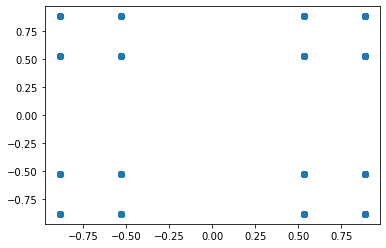

In [23]:
A = np.exp(1j*np.exp(1j*rng.integers(4, size=1000)*np.pi/2+1j*np.pi/4))
B = np.exp(1j*0.25*np.exp(1j*rng.integers(4, size=1000)*np.pi/2+1j*np.pi/4))

plt.scatter(np.real(np.log(A*B)),np.imag(np.log(A*B)))

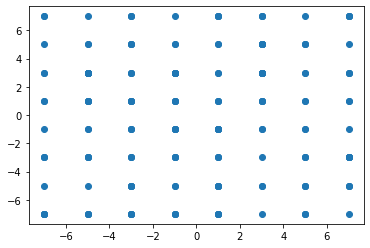

In [24]:
# complex number: a+jb
# modulation with exp(j*phi+alpha)=a+jb
x=(2*rng.integers(-4,4,200)+1)+1j*(2*rng.integers(-4,4,200)+1)

# x auf Kanal:
plt.scatter(np.real(x), np.imag(x))

[1.62904827 1.9560115  2.29248374 1.62904827 2.03022151 1.76318026
 2.03022151 0.34657359 1.9560115  1.9560115  1.44518588 0.34657359
 1.62904827 2.03022151 2.03022151 0.34657359 2.29248374 1.62904827
 1.76318026 2.03022151 2.15203255 2.29248374 2.03022151 1.15129255
 1.9560115  2.15203255 0.34657359 2.15203255 1.9560115  1.62904827
 2.03022151 1.76318026 2.15203255 1.15129255 0.34657359 1.62904827
 1.62904827 1.9560115  1.9560115  1.9560115  1.62904827 1.44518588
 1.15129255 1.76318026 2.03022151 1.76318026 2.15203255 1.76318026
 1.62904827 1.15129255 2.03022151 1.76318026 1.15129255 2.03022151
 1.76318026 2.15203255 2.29248374 1.44518588 2.29248374 2.29248374
 1.76318026 1.76318026 2.29248374 2.03022151 1.44518588 1.76318026
 1.62904827 1.15129255 1.44518588 2.03022151 1.76318026 2.15203255
 1.62904827 1.76318026 2.03022151 1.15129255 1.15129255 1.76318026
 1.9560115  1.9560115  2.29248374 1.62904827 1.15129255 0.34657359
 2.15203255 1.15129255 1.76318026 1.15129255 1.15129255 1.4451

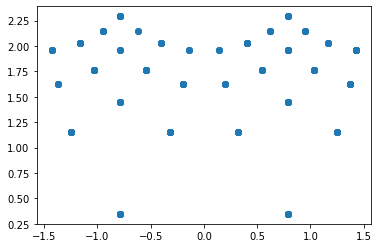

In [25]:
phi = np.sign(np.imag(x))*np.arctan(np.imag(x)/np.real(x))
alpha = 0.5*np.log((np.real(x))**2+np.imag(x)**2)
print(alpha)
plt.scatter(phi, alpha)

## Modulation auf dem Gitter der Eisenstein-Zahlen ##